
### 공원총면적

```

```

In [1]:
# visualization
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from anyio import sleep

from backup.module.preprocess import drop_columns

fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumGothic.ttf',  # ttf 파일이 저장되어 있는 경로
    name='NanumBarunGothic')  # 이 폰트의 원하는 이름 설정
fm.fontManager.ttflist.insert(0, fe)  # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 10, 'font.family': 'AppleGothic'})  # 폰트 설정
plt.rc('font', family='AppleGothic')
import seaborn as sns

# utils
import pandas as pd
import numpy as np
from tqdm import tqdm
import pickle
import warnings;

warnings.filterwarnings('ignore')

# Model
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import lightgbm as lgb
import eli5
from eli5.sklearn import PermutationImportance

In [2]:
# sys.path를 수정하여 모듈 경로를 설정
import sys
import os
import pandas as pd

# 프로젝트 루트 경로 추가
project_root = os.path.abspath("..")
sys.path.append(project_root)
# 모든 컬럼 출력 설정
# pd.set_option('display.max_columns', None)
# 모든 행 출력 설정
# pd.set_option('display.max_rows', None)

import module

In [3]:
df, df_test_y = module.file_load.load_current_version()

In [4]:
df.columns

Index(['index', '시군구', '번지', '본번', '부번', '아파트명', '전용면적(㎡)', '계약년월', '계약일', '층',
       '건축년도', '도로명', '해제사유발생일', '등기신청일자', '거래유형', '중개사소재지',
       'k-단지분류(아파트,주상복합등등)', 'k-전화번호', 'k-팩스번호', '단지소개기존clob', 'k-세대타입(분양형태)',
       'k-관리방식', 'k-복도유형', 'k-난방방식', 'k-전체동수', 'k-전체세대수', 'k-건설사(시공사)',
       'k-시행사', 'k-사용검사일-사용승인일', 'k-연면적', 'k-주거전용면적', 'k-관리비부과면적',
       'k-전용면적별세대현황(60㎡이하)', 'k-전용면적별세대현황(60㎡~85㎡이하)', 'k-85㎡~135㎡이하',
       'k-135㎡초과', 'k-홈페이지', 'k-등록일자', 'k-수정일자', '고용보험관리번호', '경비비관리형태',
       '세대전기계약방법', '청소비관리형태', '건축면적', '주차대수', '기타/의무/임대/임의=1/2/3/4', '단지승인일',
       '사용허가여부', '관리비 업로드', '좌표X', '좌표Y', '단지신청일', 'target', '금리_단기1년전차이',
       'nearest_subway_distance', 'nearest_bus_distance', '1차역세권', '2차역세권',
       '1차버스정류장', '경과연도', '경과구분', '평수', '층_그룹', '평수_그룹', '시', '구', '동',
       '아파트ID', '아파트ID거리', 'nearest_park_distance', '가까운공원이름', '가까운공원ID',
       '공원갯수', '공원총면적', '공원생활권점수', '산책로갯수', '산책로총길이', '산책생활권점수', '생태문화길갯수',
       '생태문화길총길이', '생태문화생활권점수', '한강지천길갯수', '한강지

In [5]:
df['is_test'].value_counts()  # train과 test data가 하나로 합쳐진 것을 확인할 수 있습니다.

is_test
0    1097155
1       5607
Name: count, dtype: int64

In [6]:
df['거래년월일'] = pd.to_datetime(df['계약년월'].astype(str) + df['계약일'].astype(str), format='%Y%m%d')

In [7]:
df.columns

Index(['index', '시군구', '번지', '본번', '부번', '아파트명', '전용면적(㎡)', '계약년월', '계약일', '층',
       '건축년도', '도로명', '해제사유발생일', '등기신청일자', '거래유형', '중개사소재지',
       'k-단지분류(아파트,주상복합등등)', 'k-전화번호', 'k-팩스번호', '단지소개기존clob', 'k-세대타입(분양형태)',
       'k-관리방식', 'k-복도유형', 'k-난방방식', 'k-전체동수', 'k-전체세대수', 'k-건설사(시공사)',
       'k-시행사', 'k-사용검사일-사용승인일', 'k-연면적', 'k-주거전용면적', 'k-관리비부과면적',
       'k-전용면적별세대현황(60㎡이하)', 'k-전용면적별세대현황(60㎡~85㎡이하)', 'k-85㎡~135㎡이하',
       'k-135㎡초과', 'k-홈페이지', 'k-등록일자', 'k-수정일자', '고용보험관리번호', '경비비관리형태',
       '세대전기계약방법', '청소비관리형태', '건축면적', '주차대수', '기타/의무/임대/임의=1/2/3/4', '단지승인일',
       '사용허가여부', '관리비 업로드', '좌표X', '좌표Y', '단지신청일', 'target', '금리_단기1년전차이',
       'nearest_subway_distance', 'nearest_bus_distance', '1차역세권', '2차역세권',
       '1차버스정류장', '경과연도', '경과구분', '평수', '층_그룹', '평수_그룹', '시', '구', '동',
       '아파트ID', '아파트ID거리', 'nearest_park_distance', '가까운공원이름', '가까운공원ID',
       '공원갯수', '공원총면적', '공원생활권점수', '산책로갯수', '산책로총길이', '산책생활권점수', '생태문화길갯수',
       '생태문화길총길이', '생태문화생활권점수', '한강지천길갯수', '한강지

In [8]:
# 결측치가 많거나 필요 없는 컬럼을 정리한다
drop_columns = [
    'index', '시군구', '본번', '부번',
    '해제사유발생일', '등기신청일자', '거래유형', '중개사소재지',
    'k-단지분류(아파트,주상복합등등)', 'k-전화번호', 'k-팩스번호', '단지소개기존clob', 'k-세대타입(분양형태)',
    'k-관리방식', 'k-복도유형', 'k-난방방식', 'k-전체동수', 'k-전체세대수', 'k-건설사(시공사)',
    'k-시행사', 'k-사용검사일-사용승인일', 'k-연면적', 'k-주거전용면적', 'k-관리비부과면적',
    'k-전용면적별세대현황(60㎡이하)', 'k-전용면적별세대현황(60㎡~85㎡이하)', 'k-85㎡~135㎡이하',
    'k-135㎡초과', 'k-홈페이지', 'k-등록일자', 'k-수정일자', '고용보험관리번호', '경비비관리형태',
    '세대전기계약방법', '청소비관리형태', '건축면적', '주차대수', '기타/의무/임대/임의=1/2/3/4', '단지승인일',
    '사용허가여부', '관리비 업로드', '단지신청일',
    'nearest_subway_distance', 'nearest_bus_distance', '1차역세권', '2차역세권',
    '1차버스정류장', '경과연도', '경과구분', '시',
    'nearest_park_distance',
    '가까운공원이름',
    '공원생활권점수',
    '산책로갯수',
    '산책로총길이',
    '산책생활권점수',
    '생태문화길갯수',
    '생태문화길총길이',
    '생태문화생활권점수',
    '한강지천길갯수',
    '한강지천길총길이',
    '숲세권종합점수',
    '숲세권등급',
    '한강거리',
    '지가지수',
    '아파트전세_전기대비증감률',
    '실업률',
    '민간소비',
    '소비자심리지수',
    '경제심리지수',
    '여수신 금리차',
    '계약일',
    '전용면적(㎡)',
    '공원갯수',
    '공원총면적',
    '한강지천생활권점수',
     '층_그룹', '평수_그룹',
]

# 전처리

In [9]:
df_select = module.preprocess.drop_columns(df, drop_columns)

In [10]:
module.preprocess.아파트_unique_key_add(df_select)
# 아파트_unique_key

In [11]:
df_select['거래년월주'] = (
    df_select['거래년월일'].dt.isocalendar().year.astype(str) +
    df_select['거래년월일'].dt.isocalendar().week.astype(str).str.zfill(2)
)

In [12]:
df_select_train = df_select.query('is_test == 0')
df_select_test = df_select.query('is_test == 1')

df_select_train.shape, df_select_test.shape

((1097155, 20), (5607, 20))

In [13]:
# 2. 아파트_unique_key와 거래년월주 기준으로 평균 계산
weekly_avg = (
    df_select_train
    .groupby([
        '번지', '아파트명', '계약년월', '층', '건축년도', '도로명', '좌표X', '좌표Y',
       '금리_단기1년전차이', '평수', '구', '동', '아파트ID', '아파트ID거리', '가까운공원ID', 'is_test',
       '거래년월일', '아파트_unique_key', '거래년월주'
    ])['target']
    .mean()  # 'target' 열만 평균 계산
    .reset_index()  # 인덱스 리셋
)
weekly_avg['target'] = weekly_avg['target'].astype(int)

In [14]:
weekly_avg = weekly_avg.drop(['아파트_unique_key'], axis=1)

In [15]:
weekly_avg.isnull().sum()

번지            0
아파트명          0
계약년월          0
층             0
건축년도          0
도로명           0
좌표X           0
좌표Y           0
금리_단기1년전차이    0
평수            0
구             0
동             0
아파트ID         0
아파트ID거리       0
가까운공원ID       0
is_test       0
거래년월일         0
거래년월주         0
target        0
dtype: int64

In [16]:
df_select = pd.concat([weekly_avg, df_select_test])

In [17]:
df_select.isnull().sum()

번지                      0
아파트명                    0
계약년월                    0
층                       0
건축년도                    0
도로명                     0
좌표X                     0
좌표Y                     0
금리_단기1년전차이              0
평수                      0
구                       0
동                       0
아파트ID                   0
아파트ID거리                 0
가까운공원ID                 0
is_test                 0
거래년월일                   0
거래년월주                   0
target               5607
아파트_unique_key    1088318
dtype: int64

In [18]:
df_select = df_select.drop(['아파트_unique_key', '거래년월일', '계약년월',], axis=1)

In [19]:
module.preprocess.번지_본번_부번_결측채우기(df_select)
module.preprocess.한강거리_add(df_select)

In [20]:
df_select.columns

Index(['번지', '아파트명', '층', '건축년도', '도로명', '좌표X', '좌표Y', '금리_단기1년전차이', '평수', '구',
       '동', '아파트ID', '아파트ID거리', '가까운공원ID', 'is_test', '거래년월주', 'target',
       '한강거리'],
      dtype='object')

# 파생변수

In [21]:
gangnam_8_schools = ['강남구', '서초구', '송파구']
df_select['학군'] = df_select['구'].apply(lambda x: 1 if x in gangnam_8_schools else 0)

In [22]:
df_select.isnull().sum()

번지               0
아파트명             0
층                0
건축년도             0
도로명              0
좌표X              0
좌표Y              0
금리_단기1년전차이       0
평수               0
구                0
동                0
아파트ID            0
아파트ID거리          0
가까운공원ID          0
is_test          0
거래년월주            0
target        5607
한강거리             0
학군               0
dtype: int64

In [23]:
final_drop_columns = []
df_select.drop(final_drop_columns, axis=1, inplace=True)

# Model Training

## 범주형 변수 Encoding

In [24]:
df_select.isnull().sum()

번지               0
아파트명             0
층                0
건축년도             0
도로명              0
좌표X              0
좌표Y              0
금리_단기1년전차이       0
평수               0
구                0
동                0
아파트ID            0
아파트ID거리          0
가까운공원ID          0
is_test          0
거래년월주            0
target        5607
한강거리             0
학군               0
dtype: int64

In [25]:
model_data = df_select.copy()

In [26]:
model_data.columns

Index(['번지', '아파트명', '층', '건축년도', '도로명', '좌표X', '좌표Y', '금리_단기1년전차이', '평수', '구',
       '동', '아파트ID', '아파트ID거리', '가까운공원ID', 'is_test', '거래년월주', 'target',
       '한강거리', '학군'],
      dtype='object')

In [27]:
dt_train, dt_test = module.preprocess.split_train_test(model_data)
categorical_columns_v2 = module.preprocess.범주형_filter(dt_train)
label_encoders = module.preprocess.범주형_encoding(dt_train, dt_test, categorical_columns_v2)
print(dt_train.shape, dt_test.shape)

100%|██████████| 8/8 [00:01<00:00,  5.82it/s]

(1088318, 18) (5607, 18)


## Model Training


# 훈련데이터 분할

In [28]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
import lightgbm as lgb


In [29]:
# K-Fold 설정
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

In [64]:
# LightGBM 파라미터
lgb_params = {
    'boosting_type':'dart',  # 부스팅 타입 (기본값: 'gbdt')
    'num_leaves':258,         # 리프 노드의 최대 개수 (기본값: 31)
    'max_depth':8,          # 트리의 최대 깊이 (-1은 제한 없음)
    'learning_rate':0.07224290084064122,     # 학습률 (기본값: 0.1)
    'n_estimators':301,      # 부스팅 반복 횟수 (기본값: 100)
    'min_child_samples':5,  # 자식 노드를 분할하기 위한 최소 데이터 수 (기본값: 20)
    'subsample':0.9773487107075421,         # 데이터 샘플링 비율 (기본값: 1.0)
    'colsample_bytree':0.9011817947068029,  # 트리 생성 시 feature 샘플링 비율 (기본값: 1.0)
    'reg_alpha':0.04063525938772354,
    'reg_lambda':0.0014482851327836004,
    'verbosity': 1,
    'random_state':42     
}

# Test 데이터 예측값 저장 리스트

In [69]:
ford_list= module.preprocess.kfold_split_X_y(data= dt_train, target_column='target', n_splits=20)

In [70]:
X_train, X_val, y_train, y_val = ford_list[0]
cnt = 1
for ford in ford_list:
    cnt += 1
    X_train, X_val, y_train, y_val = ford

In [71]:
foldCount = 1
models = []  # 학습된 모델 저장
# data, target_column='target', n_splits=
for folds in ford_list:
    print(f"Fold {foldCount}")
    X_train, X_val, y_train, y_val = folds
    
    # 모델 학습
    model = lgb.LGBMRegressor(**lgb_params)
    model.fit(
        X_train, y_train,
        eval_set=[(X_train, y_train), (X_val, y_val)],
        eval_names=['train', 'valid'],
    )
    
    models.append(model)
    foldCount += 1

Fold 1
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.018981 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3009
[LightGBM] [Info] Number of data points in the train set: 1033902, number of used features: 17
[LightGBM] [Info] Start training from score 57063.470041
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

# 퍼플릭 데이터 예측

In [78]:
xx_test = dt_test.drop(['target'], axis=1)
predictions = [model.predict(xx_test, num_iteration=model.best_iteration_) for model in models]
real_test_pred = np.mean(predictions, axis=0)  # 예측값 평균
print(f'RMSE test: {np.sqrt(metrics.mean_squared_error(df_test_y, real_test_pred))}')
# 5개 22160
# 10개 22067
# 15개 22070
# 20개 22061

RMSE test: 22061.427685269533


In [79]:
# Squared_error를 계산하는 함수를 정의하겠습니다.
def calculate_se(target, pred):
    squared_errors = (target - pred) ** 2
    return squared_errors

In [80]:
X_val = xx_test.reset_index(drop=True)
X_val

,번지,아파트명,층,건축년도,도로명,좌표X,좌표Y,금리_단기1년전차이,평수,구,동,아파트ID,아파트ID거리,가까운공원ID,거래년월주,한강거리,학군
0,1678,327,10,1983,4465,127.068028,37.487802,2.25,22,0,8,1200,0.000000,1661,832,3113.804133,1
1,1665,328,3,1983,471,127.072682,37.489122,2.25,25,0,8,1199,45.380282,1731,829,2867.571730,1
2,1665,328,10,1983,471,127.072682,37.489122,2.50,25,0,8,1199,45.380282,1731,833,2867.571730,1
3,728,1933,7,2019,4978,127.064151,37.480049,1.75,18,0,8,250,117.916314,1691,819,3968.559871,1
4,728,1933,8,2019,4978,127.064151,37.480049,2.25,25,0,8,250,117.916314,1691,828,3968.559871,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5602,3322,36,4,2021,5352,126.891951,37.584794,1.25,25,21,163,181,0.000000,747,805,2881.698680,0
5603,3322,36,6,2021,5352,126.891951,37.584794,1.25,25,21,163,181,0.000000,747,806,2881.698680,0
5604,3322,36,7,2021,5352,126.891951,37.584794,1.25,25,21,163,181,0.000000,747,807,2881.698680,0
5605,3322,36,4,2021,5352,126.891951,37.584794,1.75,25,21,163,181,0.000000,747,815,2881.698680,0


In [81]:
X_val['target'] = df_test_y
X_val['pred'] = real_test_pred
X_val['예측차이'] = X_val['target'] - X_val['pred']
# RMSE 계산
squared_errors = calculate_se(X_val['target'], X_val['pred'])
X_val['error'] = squared_errors
# Error가 큰 순서대로 sorting 해 보겠습니다.
X_val_sort = X_val.sort_values(by='error', ascending=False)  # 내림차순 sorting

In [149]:
# Error 범위별 카운트
error_bins = [0, 1000, 10000, 100000, 1000000, 5000000,1000000000,2000000000,3000000000 , 4000000000, 5000000000, 7500000000,10000000000 , 20000000000,  40000000000,  60000000000,  80000000000] #  20000000000
X_val_sort['error_bin'] = pd.cut(X_val_sort['error'], bins=error_bins)
error_count = X_val_sort['error_bin'].value_counts().sort_index()

In [150]:
error_count

error_bin
(0, 1000]                       14
(1000, 10000]                   16
(10000, 100000]                124
(100000, 1000000]              298
(1000000, 5000000]             477
(5000000, 1000000000]         4101
(1000000000, 2000000000]       363
(2000000000, 3000000000]        93
(3000000000, 4000000000]        42
(4000000000, 5000000000]        22
(5000000000, 7500000000]        21
(7500000000, 10000000000]       15
(10000000000, 20000000000]       9
(20000000000, 40000000000]      10
(40000000000, 60000000000]       0
(60000000000, 80000000000]       0
Name: count, dtype: int64

In [142]:
X_val_sort_top100 = X_val.sort_values(by='error', ascending=False).head(1000)  # 예측을 잘 하지못한 top 100개의 data
X_val_sort_tail100 = X_val.sort_values(by='error', ascending=False).tail(1000)  # 예측을 잘한 top 100개의 data

In [143]:
# 해석을 위해 레이블인코딩 된 변수를 복원해줍니다.
error_top100 = X_val_sort_top100.copy()
for column in categorical_columns_v2:  # 앞서 레이블 인코딩에서 정의했던 categorical_columns_v2 범주형 변수 리스트를 사용합니다.
    error_top100[column] = label_encoders[column].inverse_transform(X_val_sort_top100[column])

best_top100 = X_val_sort_tail100.copy()
for column in categorical_columns_v2:  # 앞서 레이블 인코딩에서 정의했던 categorical_columns_v2 범주형 변수 리스트를 사용합니다.
    best_top100[column] = label_encoders[column].inverse_transform(X_val_sort_tail100[column])

In [128]:
# error_top100.to_csv('8_error.csv', index=False)
# best_top100.to_csv('8_top.csv', index=False)

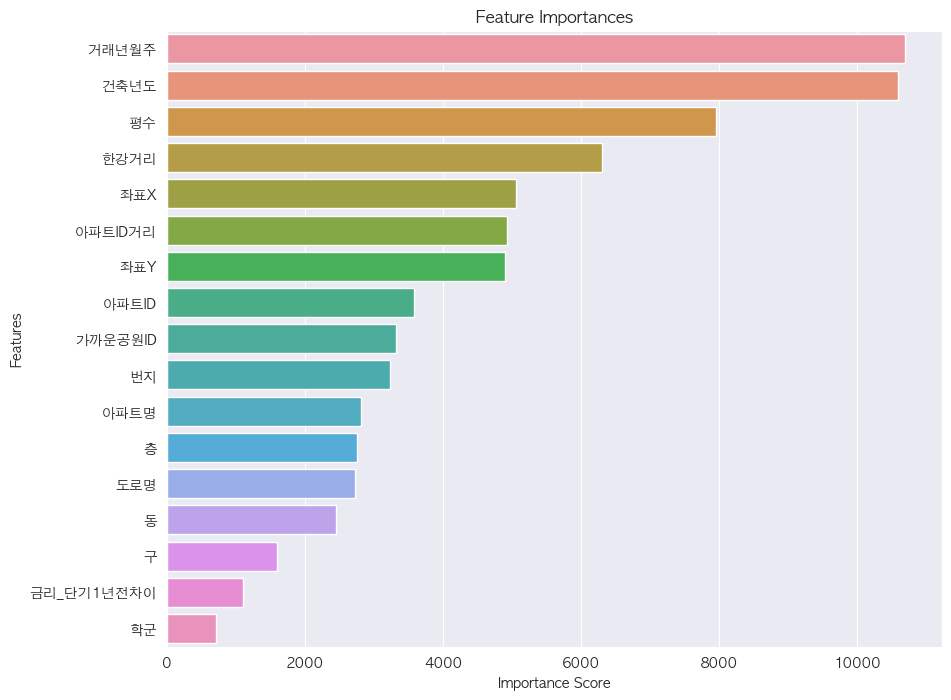

In [129]:
# Feature Importances 추출 및 정렬
importances = pd.Series(model.feature_importances_, index=list(X_train.columns))
importances = importances.sort_values(ascending=False)

# Feature Importance 시각화
plt.figure(figsize=(10, 8))
plt.title("Feature Importances")
sns.barplot(x=importances, y=importances.index)
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()

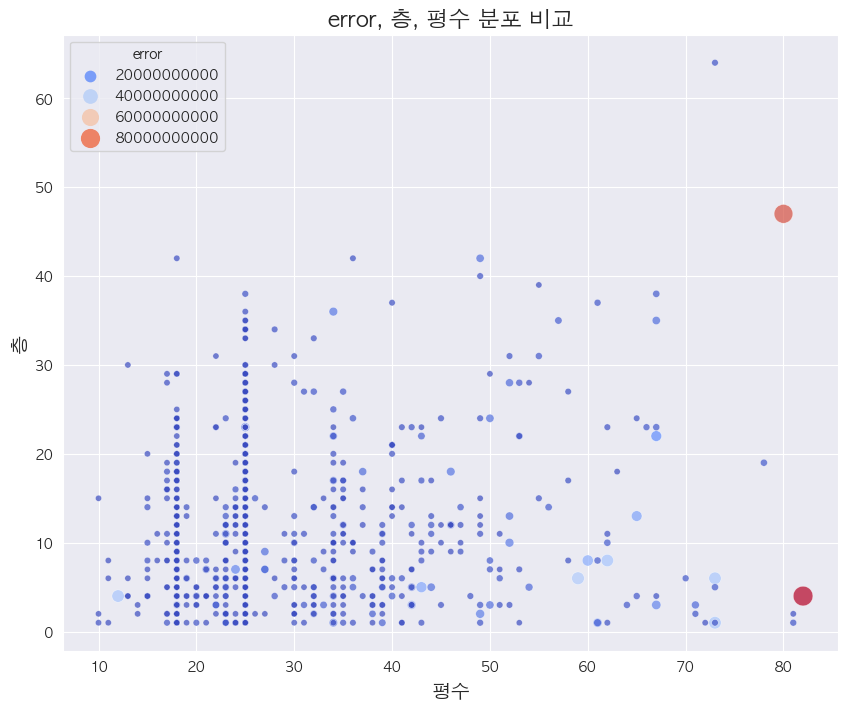

In [148]:
# 2D 히트맵으로 target, 층, 전용면적의 분포 비교
plt.figure(figsize=(10, 8))
sns.scatterplot(
    data=error_top100,
    x='평수',
    y='층',
    size='error',
    hue='error',
    palette='coolwarm',
    alpha=0.7,
    sizes=(20, 200)
)
plt.title('error, 층, 평수 분포 비교', fontsize=16)
plt.xlabel('평수', fontsize=14)
plt.ylabel('층', fontsize=14)
plt.legend(title='error')
plt.grid(True)
plt.show()

In [131]:
print(error_top100['층'].value_counts().sort_values(ascending=False))
print(error_top100['평수'].value_counts())

층
5     174
4     169
3     152
7     150
8     144
12    139
6     137
2     137
10    131
9     125
1     117
11    114
13    109
15    107
14    101
17     63
16     59
19     54
18     54
20     38
22     33
21     32
23     28
24     23
29     16
25     15
27     14
28     12
26      9
31      6
34      5
30      5
42      5
33      4
35      4
32      3
38      2
37      2
36      2
39      1
44      1
40      1
64      1
47      1
45      1
Name: count, dtype: int64
평수
25    934
18    475
17    107
34     87
15     69
     ... 
80      1
57      1
60      1
59      1
82      1
Name: count, Length: 72, dtype: int64


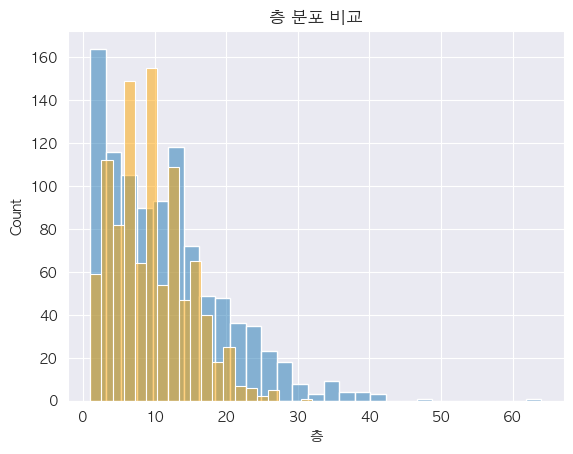

In [147]:
sns.histplot(data=error_top100, x='층', alpha=0.5)
sns.histplot(data=best_top100, x='층', color='orange', alpha=0.5)
plt.title('층 분포 비교')
plt.show()

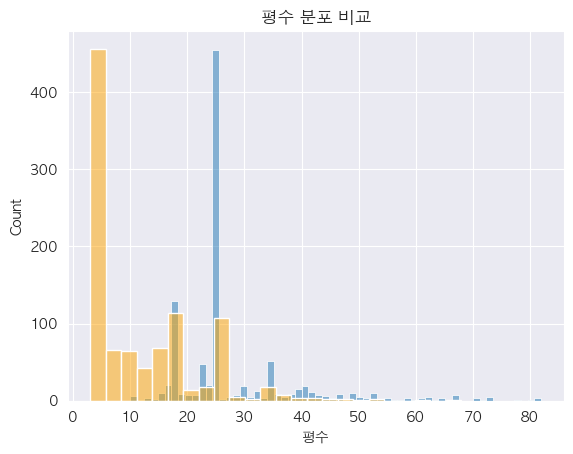

In [146]:
sns.histplot(data=error_top100, x='평수', alpha=0.5)
sns.histplot(data=best_top100, x='평수', color='orange', alpha=0.5)
plt.title('평수 분포 비교')
plt.show()

In [134]:
error_top100

,번지,아파트명,층,건축년도,도로명,좌표X,좌표Y,금리_단기1년전차이,평수,구,...,아파트ID,아파트ID거리,가까운공원ID,거래년월주,한강거리,학군,target,pred,예측차이,error
2201,1496-24,트라움하우스3,4,2002,명달로 97-14,127.002921,37.486202,2.25,82,서초구,...,A13784102,391.153802,P02373,202249,2477.029577,1,640000.0,324376.805810,315623.194190,9.961800e+10
4881,685-700,아크로서울포레스트,47,2020,왕십리로 83-21,127.043847,37.544464,1.75,80,성동구,...,A10024503,33.425547,P00357,202239,1034.605382,0,1300000.0,999780.761189,300219.238811,9.013159e+10
3679,369-1,현대1차,6,1976,압구정로29길 71,127.027926,37.533027,1.25,59,강남구,...,A13589802,23.804947,P02575,202227,215.420231,1,800000.0,610613.223406,189386.776594,3.586735e+10
4810,612-28,비버리힐즈,1,1998,사평대로12길 27,126.992966,37.496919,1.75,73,서초구,...,A13783001,286.231418,P02477,202229,1119.412412,1,450000.0,265794.054228,184205.945772,3.393183e+10
3633,193-1,힐데스하임빌라,6,1998,남부순환로377길 26,127.045027,37.488125,1.75,73,강남구,...,A13527004,138.420534,P02556,202229,3725.539043,1,500000.0,316846.848737,183153.151263,3.354508e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,1357,삼각산아이원,10,2003,삼양로19길 113,127.018127,37.615226,2.25,25,강북구,...,A14210002,0.516156,P00805,202301,7724.347996,0,65000.0,77046.608730,-12046.608730,1.451208e+08
1403,720-1,대상타운현대,10,2001,마들로 616,127.047880,37.665523,2.25,25,도봉구,...,A13202002,0.000000,P00925,202247,12639.041187,0,86000.0,73957.227920,12042.772080,1.450284e+08
3325,631-1,대호프라자,3,2000,불광로 90,126.932861,37.614755,2.25,12,은평구,...,A12284701,0.871099,P01183,202250,7529.134424,0,30000.0,42041.694317,-12041.694317,1.450024e+08
1467,1009,힐스테이트청계,13,2018,천호대로55길 11,127.046194,37.571542,2.25,14,동대문구,...,A13003005,112.688399,P00469,202304,3666.555342,0,79000.0,66962.554075,12037.445925,1.449001e+08


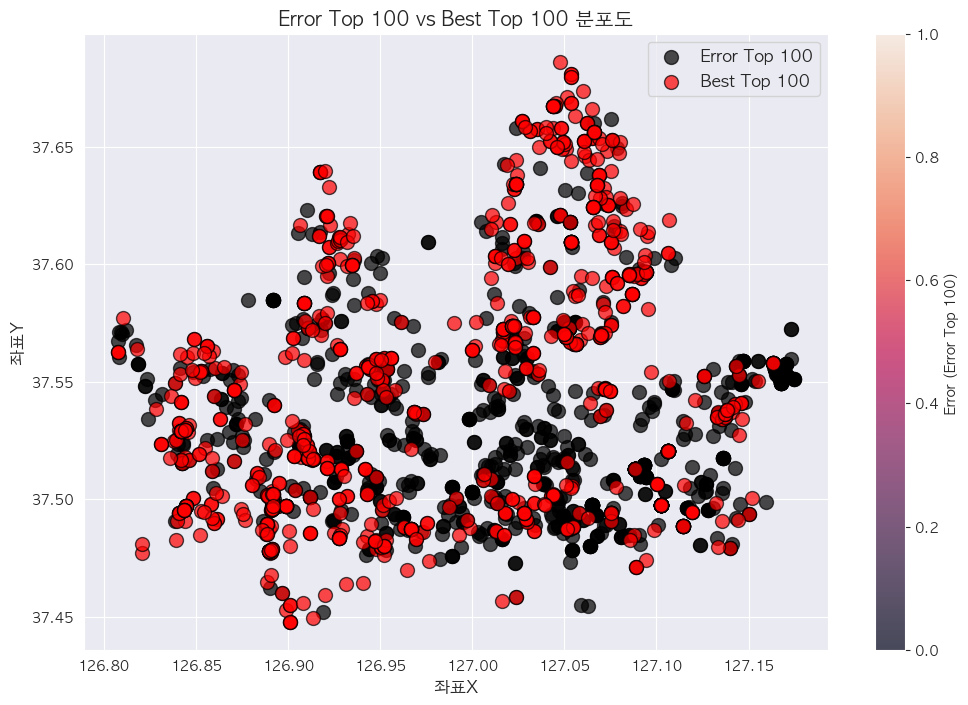

In [144]:

# 그래프 생성
plt.figure(figsize=(12, 8))

# error_top100 산점도
scatter1 = plt.scatter(
    error_top100['좌표X'], error_top100['좌표Y'],
    c='black', s=100, edgecolor='k', alpha=0.7, label='Error Top 100'
)

# best_top100 산점도
scatter2 = plt.scatter(
    best_top100['좌표X'], best_top100['좌표Y'],
    c='red', s=100, edgecolor='k', alpha=0.7, label='Best Top 100'
)

# 컬러바 추가 (error_top100용)
plt.colorbar(scatter1, label='Error (Error Top 100)')

# 축 및 제목 설정
plt.xlabel('좌표X', fontsize=12)
plt.ylabel('좌표Y', fontsize=12)
plt.title('Error Top 100 vs Best Top 100 분포도', fontsize=14)
plt.grid(True)

# 범례 추가
plt.legend(fontsize=12)

# 그래프 표시
plt.show()